# Lecture 1 Geometry of Linear Algebra

## Systems of Linear Equations

Is list of linear equations. i.e.  
<span class="math-inline">2x \+ y \= 3</span>  
<span class="math-inline">x \- 2y \= \-1</span>

## Use of `SymPy` to solve the above system of equations

If you haven't install SymPy library yet please run command
`pip install sympy` or if you use conda package manager then run
`conda install sympy -y` should install the library.

In [1]:
# pip:
# %pip install sympy
# conda
# %conda install sympy -y

In [2]:
import matplotlib.pyplot as plt
import sympy as syp

In [3]:
# help(syp.Symbol)

In [4]:
x, y = syp.Symbol('x'), syp.Symbol('y')
type(x), type(y)

(sympy.core.symbol.Symbol, sympy.core.symbol.Symbol)

In [5]:
# help(syp.Eq)

In [6]:
eq1 = syp.Eq(2*x + y, 3)
eq2 = syp.Eq(x - 2*y, -1)
type(eq1), type(eq2)

(sympy.core.relational.Equality, sympy.core.relational.Equality)

## Solve the systems of equations using Solver

In [7]:
# help(syp.solvers.solve)

In [8]:
solution = syp.solvers.solve([eq1, eq2], (x, y))
print(f"x = {solution[x]}, y = {solution[y]}")

x = 1, y = 1


This is probably things that you have done in high school.    
But let's visualize system of linear equations in several useful ways.

## Row Picture (Graphical Representation)

We have list of linear equations
let's plot those equations in cartesian plane.

In [9]:
# help(plot_implicit)

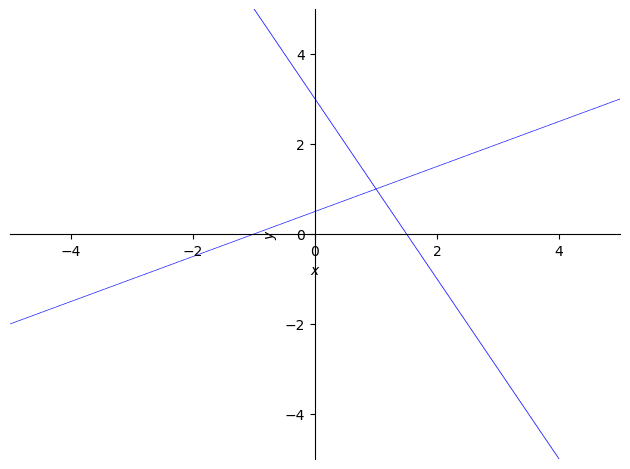

In [10]:
from sympy import plot_implicit
plot_eq1 = plot_implicit(eq1, show=False)
plot_eq2 = plot_implicit(eq2, show=False)

plot_eq1.extend(plot_eq2)
plot_eq1.show()

Easy peasy, just plot the lines.

## Column Pictures (Vector Representation)

Now if we rewrite the equations in matrix form.

$$
\begin{bmatrix}
2 & 1 \\
1 & -2 
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
3 \\
-1
\end{bmatrix}
$$

We can also represent the system using column vectors like this:

$$
x\begin{bmatrix}
2 \\
1
\end{bmatrix}
+
y\begin{bmatrix}
1 \\
-2
\end{bmatrix}
=
\begin{bmatrix}
3 \\
-1
\end{bmatrix}
$$

## Representing the System as Ax = b

We can concisely express the system of linear equations in the matrix form **Ax = b**, where:

*   **A** is the *coefficient matrix*:
    $$
    A = \begin{bmatrix}
    2 & 1 \\
    1 & -2 
    \end{bmatrix}
    $$

*   **x** is the *vector of unknowns*:
    $$
    x = \begin{bmatrix}
    x \\
    y
    \end{bmatrix}
    $$

*   **b** is the *constant vector* (or *result vector*):
    $$
    b = \begin{bmatrix}
    3 \\
    -1
    \end{bmatrix}
    $$

Thus, our system of equations is equivalent to:

$$
\begin{bmatrix}
2 & 1 \\
1 & -2 
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
3 \\
-1
\end{bmatrix}
$$

Which is in the form **Ax = b**. This representation is fundamental in linear algebra as it allows us to use powerful matrix operations to solve systems of equations.

In [11]:
# numpy is most popular linear algebra library in Python ecosystem
import numpy as np 
# write Ax = b in matrix form
col1 = np.array([2, 1])
col2 = np.array([1, -2])
b = np.array([3, -1])
A = np.column_stack((col1, col2))

In [12]:
A

array([[ 2,  1],
       [ 1, -2]])

In [13]:
b

array([ 3, -1])

In numpy you can use `np.linalg.solve` to solve the system of equations.

In [14]:
x = np.linalg.solve(A, b)
x

array([1., 1.])

In [15]:
# help(plt.arrow)

But that's not the main point here.   
Let's visualize the system of equations as column vectors representation.

/var/folders/tc/5nkzd61n29s6sv95pcw358g00000gn/T/ipykernel_57189/1500341335.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


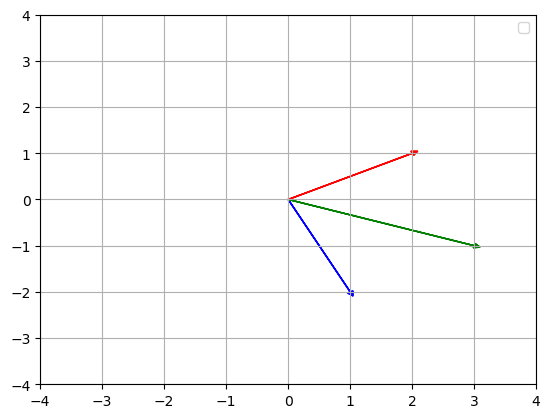

In [16]:
# inferred arrow1, arrow2 from vector col1, col2
arrow1 = plt.arrow(0, 0, col1[0], col1[1], head_width=0.1, head_length=0.1, fc='r', ec='r')
arrow2 = plt.arrow(0, 0, col2[0], col2[1], head_width=0.1, head_length=0.1, fc='b', ec='b')
# target vector that we want to reach
target_arrow = plt.arrow(0, 0, b[0], b[1], head_width=0.1, head_length=0.1, fc='g', ec='g')

# plot the arrows
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid()
plt.gca().add_patch(arrow1)
plt.gca().add_patch(arrow2)
plt.gca().add_patch(target_arrow)
plt.legend()
plt.show()

In [17]:
x_val, y_val = x[0], x[1]
print(f"x = {x_val}, y = {y_val}")

x = 1.0, y = 1.0


## Visualizing and Understanding Vector Addition

### Geometric and Algebraic Interpretations of Vector Addition

Vector addition is a fundamental operation in linear algebra where two or more vectors are combined to produce a resultant vector, known as the vector sum. We can understand this operation through two primary perspectives: geometric (using the parallelogram law) and algebraic.

#### Geometric Interpretation: The Parallelogram Law

Geometrically, vector addition can be visualized using the **parallelogram law**.  If we represent two vectors as the sides of a parallelogram, their sum is represented by the diagonal of that parallelogram originating from the same point as the two vectors.

#### Algebraic Interpretation: Component-wise Addition

Algebraically, vector addition is performed **component-wise**. This means we add the corresponding components of the vectors to obtain the components of the resultant vector.

**Example:**

Let's say we have two vectors, **u** and **v**:

$$
\mathbf{u} = \begin{bmatrix} u_1 \\ u_2 \end{bmatrix}, \quad
\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \end{bmatrix}
$$

Their sum, **w** = **u** + **v**, is calculated as follows:

$$
\mathbf{w} = \mathbf{u} + \mathbf{v} = \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} + \begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} u_1 + v_1 \\ u_2 + v_2 \end{bmatrix}
$$

**In essence:**

*   The first component of **w** is the sum of the first components of **u** and **v** ($u_1 + v_1$).
*   The second component of **w** is the sum of the second components of **u** and **v** ($u_2 + v_2$).

This component-wise addition extends to vectors of any dimension.  For example, if **u** and **v** were three-dimensional vectors, we would add their corresponding x, y, and z components to get the resultant vector's x, y, and z components.


/var/folders/tc/5nkzd61n29s6sv95pcw358g00000gn/T/ipykernel_57189/2025439124.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


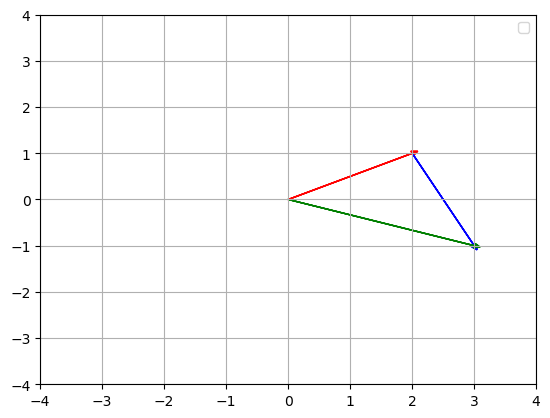

In [18]:
base_arrow1 = plt.arrow(0, 0, col1[0], col1[1], head_width=0.1, head_length=0.1, fc='r', ec='r')
extend_arrow2 = plt.arrow(col1[0], col1[1], col2[0], col2[1], head_width=0.1, head_length=0.1, fc='b', ec='b')
# target_arrow remain unchanged
# but we cannot use pyarrow in multiple plots
target_arrow_repl = plt.arrow(0, 0, b[0], b[1], head_width=0.1, head_length=0.1, fc='g', ec='g')



# plot the arrows
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid()
plt.gca().add_patch(base_arrow1)
plt.gca().add_patch(extend_arrow2)
plt.gca().add_patch(target_arrow_repl)
plt.legend()
plt.show()

Great! You just learned about the geometric and algebraic interpretations of vector addition. Now, let's visualize vector addition using Python

# Looking Ahead: Connecting Simple Equations to Linear Algebra

In basic algebra, we solve equations like  `ax = b` by dividing both sides by `a` (or equivalently, multiplying by `a`<sup>-1</sup>), yielding `x = b/a` or `x = a`<sup>-1</sup>`b`.

This seemingly simple operation foreshadows concepts we'll explore in linear algebra.  When dealing with systems of equations represented as **Ax = b**, where **A** is a matrix and **x** and **b** are vectors, we'll learn about the concept of a matrix inverse (**A**<sup>-1</sup>).  If **A**<sup>-1</sup> exists, we can solve for **x** in a similar fashion:

**x** = **A**<sup>-1</sup>**b**

However, not all matrices have inverses.  We'll delve into the conditions for invertibility and explore alternative methods for solving systems when **A**<sup>-1</sup> doesn't exist. This sets the stage for understanding concepts like matrix invertibility, determinants, and various methods for solving systems of linear equations.